In [41]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\
\midrule
Query1 &  1.0 &   0.7 &  1.00 &   1.00 &   2.94 &    3.63 &  0.71 \\
Query2 &  0.4 &   0.5 &  0.75 &   0.61 &   1.43 &    2.40 &  0.95 \\
Query3 &  0.4 &   0.5 &  0.58 &   0.49 &   1.13 &    2.03 &  1.70 \\
Query4 &  0.2 &   0.4 &  0.50 &   0.41 &   0.63 &    1.60 &  1.93 \\
Query5 &  0.0 &   0.1 &  0.00 &   0.14 &   0.00 &    0.33 &  2.10 \\
\bottomrule
\end{tabular}



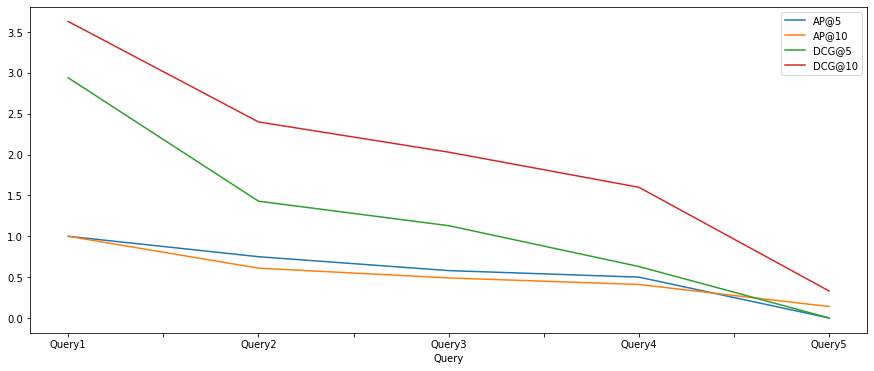

In [42]:
word2vec_results = [
    ['Query1', 1, 0.7, 1, 1, 2.94, 3.63, 0.71], 
    ['Query2', 0.4, 0.5, 0.75, 0.61, 1.43, 2.40, 0.95],
    ['Query3', 0.4, 0.5, 0.58, 0.49, 1.13, 2.03, 1.7],  
    ['Query4', 0.2, 0.4, 0.5, 0.41, 0.63, 1.60, 1.93], 
    ['Query5', 0, 0.1, 0, 0.14, 0, 0.33, 2.1]
]
word2vec_results_df = pd.DataFrame(word2vec_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
word2vec_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10'], rot=0, figsize=(15, 6))

latex_code = word2vec_results_df.to_latex(column_format='c', index=False)
print(latex_code)

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  1.0 &   0.8 &  1.00 &   0.98 &   2.94 &    3.93 &  0.73 \\ \hline
Query2 &  0.6 &   0.5 &  0.91 &   0.80 &   2.06 &    2.73 &  0.94 \\ \hline
Query3 &  0.4 &   0.5 &  0.75 &   0.60 &   1.43 &    2.39 &  1.79 \\ \hline
Query4 &  0.4 &   0.4 &  0.83 &   0.66 &   1.50 &    2.17 &  1.90 \\ \hline
Query5 &  0.2 &   0.3 &  0.33 &   0.34 &   0.50 &    1.17 &  2.17 \\ \hline
\bottomrule
\end{tabular}



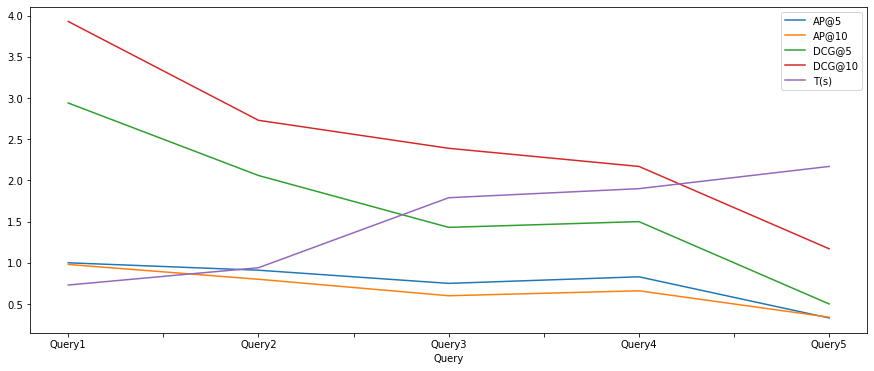

In [43]:
doc2vec_results = [
    ['Query1', 1, 0.8, 1, 0.98, 2.94, 3.93,  0.73], 
    ['Query2', 0.6, 0.5, 0.91, 0.80, 2.06, 2.73, 0.94],  
    ['Query3', 0.4, 0.5, 0.75, 0.6, 1.43, 2.39, 1.79],
    ['Query4', 0.4, 0.4, 0.83, 0.66, 1.50, 2.17, 1.90],
    ['Query5', 0.2, 0.3, 0.33, 0.34, 0.50, 1.17, 2.17], 
]
doc2vec_results_df = pd.DataFrame(doc2vec_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
doc2vec_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = doc2vec_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  0.6 &   0.6 &  0.80 &   0.72 &   1.93 &    2.90 &  0.70 \\ \hline
Query2 &  0.6 &   0.6 &  0.63 &   0.64 &   1.56 &    2.53 &  0.95 \\ \hline
Query3 &  0.4 &   0.5 &  0.83 &   0.64 &   1.50 &    2.40 &  1.81 \\ \hline
Query4 &  0.4 &   0.5 &  0.58 &   0.54 &   1.13 &    2.10 &  1.90 \\ \hline
Query5 &  0.2 &   0.4 &  0.25 &   0.35 &   0.43 &    1.40 &  2.20 \\ \hline
\bottomrule
\end{tabular}



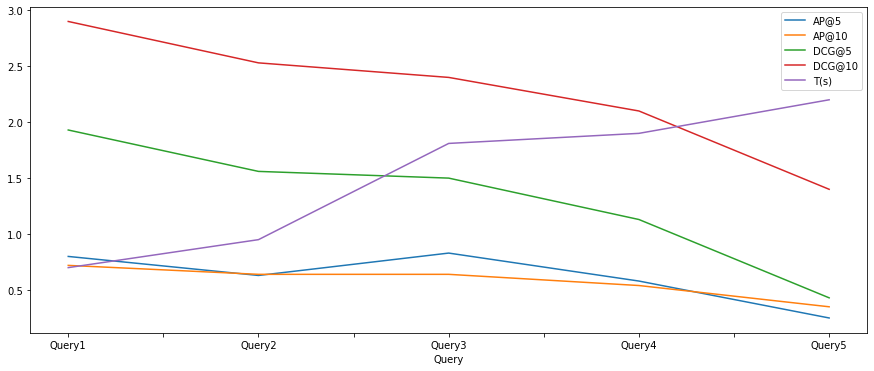

In [44]:
fast_text_results = [
    ['Query1', 0.6, 0.6, 0.80, 0.72, 1.93, 2.90,  0.70], 
    ['Query2', 0.6, 0.6, 0.63, 0.64, 1.56, 2.53, 0.95],  
    ['Query3', 0.4, 0.5, 0.83, 0.64, 1.50, 2.40, 1.81],
    ['Query4', 0.4, 0.5, 0.58, 0.54, 1.13, 2.10, 1.90],
    ['Query5', 0.2, 0.4, 0.25, 0.35, 0.43, 1.40, 2.20], 
]
fast_text_results_df = pd.DataFrame(fast_text_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
fast_text_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = fast_text_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  1.0 &   1.0 &  1.00 &   1.00 &   2.94 &    4.54 &  0.71 \\ \hline
Query2 &  0.6 &   0.6 &  1.00 &   0.82 &   2.13 &    3.10 &  1.10 \\ \hline
Query3 &  0.6 &   0.6 &  0.63 &   0.64 &   1.56 &    2.53 &  1.79 \\ \hline
Query4 &  0.4 &   0.5 &  0.58 &   0.54 &   1.13 &    2.10 &  1.89 \\ \hline
Query5 &  0.2 &   0.4 &  0.33 &   0.37 &   0.50 &    1.47 &  2.21 \\ \hline
\bottomrule
\end{tabular}



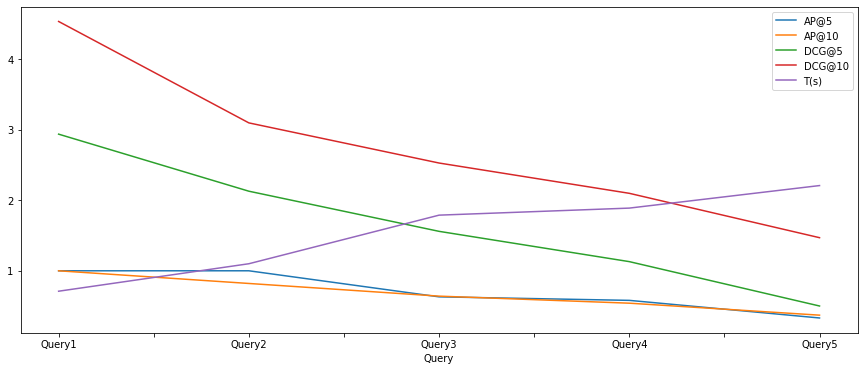

In [45]:
lsi_results = [
    ['Query1', 1, 1, 1, 1, 2.94, 4.54, 0.71], 
    ['Query2', 0.6, 0.6, 1, 0.82, 2.13, 3.10, 1.10],
    ['Query3', 0.6, 0.6, 0.63, 0.64, 1.56, 2.53, 1.79], 
    ['Query4', 0.4, 0.5, 0.58, 0.54, 1.13, 2.10, 1.89],  
    ['Query5', 0.2, 0.4, 0.33, 0.37, 0.5, 1.47, 2.21]
]
lsi_results_df = pd.DataFrame(lsi_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
lsi_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = lsi_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  0.8 &   0.7 &  1.00 &   0.90 &   2.56 &    3.53 &  0.76 \\ \hline
Query2 &  0.8 &   0.8 &  1.00 &   0.89 &   2.56 &    3.82 &  1.11 \\ \hline
Query3 &  0.8 &   0.7 &  1.00 &   0.85 &   2.56 &    3.46 &  1.84 \\ \hline
Query4 &  0.6 &   0.6 &  0.91 &   0.73 &   2.06 &    2.96 &  2.12 \\ \hline
Query5 &  0.6 &   0.7 &  0.91 &   0.75 &   2.06 &    3.30 &  2.23 \\ \hline
\bottomrule
\end{tabular}

mAP@10: 0.82


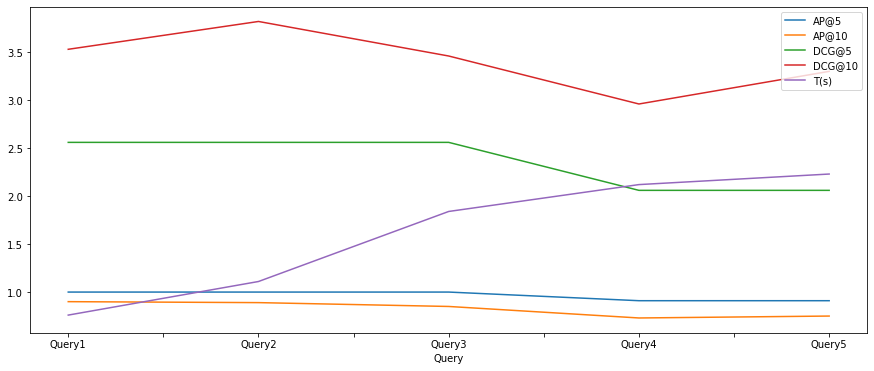

In [46]:
distilbert_results = [
    ['Query1', 0.8, 0.7, 1, 0.90, 2.56, 3.53, 0.76], 
    ['Query2', 0.8, 0.8, 1, 0.89, 2.56, 3.82, 1.11],
    ['Query3', 0.8, 0.7, 1, 0.85, 2.56, 3.46, 1.84], 
    ['Query4', 0.6, 0.6, 0.91, 0.73, 2.06, 2.96, 2.12],  
    ['Query5', 0.6, 0.7, 0.91, 0.75, 2.06, 3.30, 2.23]
]
distilbert_results_df = pd.DataFrame(distilbert_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
mAP10 = distilbert_results_df['AP@10'].mean()
distilbert_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = distilbert_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)
print(f'mAP@10: {round(mAP10, 2)}')

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  1.0 &   0.9 &  1.00 &   0.98 &   2.94 &    4.24 &  0.74 \\ \hline
Query2 &  0.8 &   0.9 &  0.88 &   0.87 &   2.44 &    4.04 &  1.13 \\ \hline
Query3 &  0.8 &   0.9 &  0.80 &   0.84 &   2.31 &    3.91 &  1.84 \\ \hline
Query4 &  0.8 &   0.8 &  0.88 &   0.82 &   2.44 &    3.68 &  2.10 \\ \hline
Query5 &  0.6 &   0.8 &  0.70 &   0.72 &   1.81 &    3.41 &  2.29 \\ \hline
\bottomrule
\end{tabular}

mAP@10: 0.85


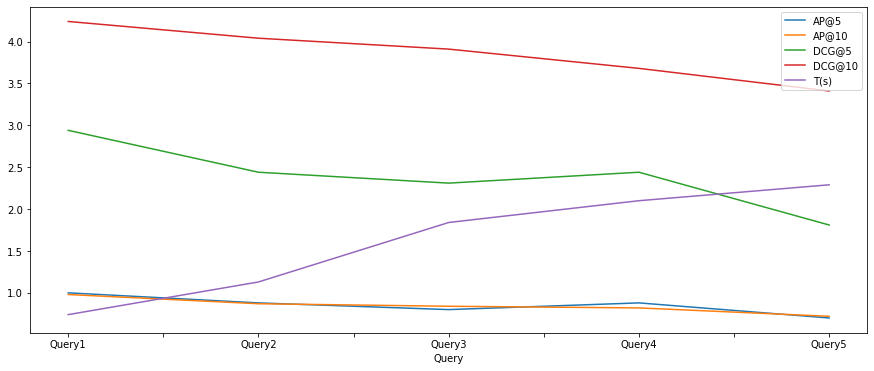

In [47]:
roberta_results = [
    ['Query1', 1, 0.9, 1, 0.98, 2.94, 4.24,  0.74], 
    ['Query2', 0.8, 0.9, 0.88, 0.87, 2.44, 4.04, 1.13],  
    ['Query3', 0.8, 0.9, 0.80, 0.84, 2.31, 3.91, 1.84],
    ['Query4', 0.8, 0.8, 0.88, 0.82, 2.44, 3.68, 2.10],
    ['Query5', 0.60, 0.80, 0.70, 0.72, 1.81, 3.41, 2.29], 
]
roberta_results_df = pd.DataFrame(roberta_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
mAP10 = roberta_results_df['AP@10'].mean()
roberta_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = roberta_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)
print(f'mAP@10: {round(mAP10, 2)}')

\begin{tabular}{c}
\toprule
 Query &  P@5 &  P@10 &  AP@5 &  AP@10 &  DCG@5 &  DCG@10 &  T(s) \\ \hline
\midrule
Query1 &  1.0 &   0.9 &  1.00 &   0.97 &   2.94 &    4.22 &  0.83 \\ \hline
Query2 &  0.8 &   0.8 &  0.88 &   0.85 &   2.44 &    3.72 &  1.22 \\ \hline
Query3 &  0.8 &   0.7 &  0.88 &   0.84 &   2.44 &    3.42 &  1.92 \\ \hline
Query4 &  0.8 &   0.7 &  0.88 &   0.83 &   2.44 &    3.40 &  2.36 \\ \hline
Query5 &  0.8 &   0.6 &  0.88 &   0.85 &   2.44 &    3.12 &  2.59 \\ \hline
\bottomrule
\end{tabular}

mAP@10: 0.87


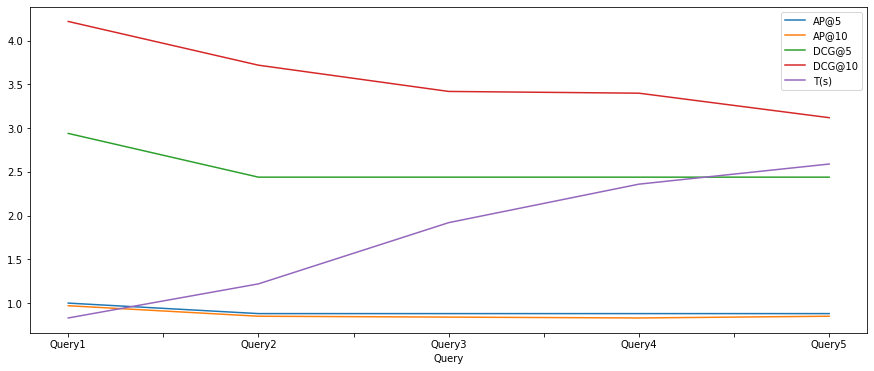

In [48]:
gpt_results = [
    ['Query1', 1, 0.9, 1, 0.97, 2.94, 4.22,  0.83], 
    ['Query2', 0.8, 0.8, 0.88, 0.85, 2.44, 3.72, 1.22],  
    ['Query3', 0.8, 0.7, 0.88, 0.84, 2.44, 3.42, 1.92],
    ['Query4', 0.8, 0.7, 0.88, 0.83, 2.44, 3.40, 2.36],
    ['Query5', 0.8, 0.6, 0.88, 0.85, 2.44, 3.12, 2.59], 
]
gpt_results_df = pd.DataFrame(gpt_results, columns=['Query', 'P@5', 'P@10', 'AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'])
mAP10 = gpt_results_df['AP@10'].mean()
gpt_results_df.plot(kind='line', x='Query', y=['AP@5', 'AP@10', 'DCG@5', 'DCG@10', 'T(s)'], rot=0, figsize=(15, 6))

latex_code = gpt_results_df.to_latex(column_format='c', index=False)
latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)
print(f'mAP@10: {round(mAP10, 2)}')

Word2Vec mAP10: 0.53
Doc2Vec mAP10: 0.68
FastText mAP10: 0.58
LSI mAP10: 0.67
DistilBERT mAP10: 0.82
RoBERTa mAP10: 0.85
GPT-1 mAP10: 0.87


<AxesSubplot:xlabel='Model'>

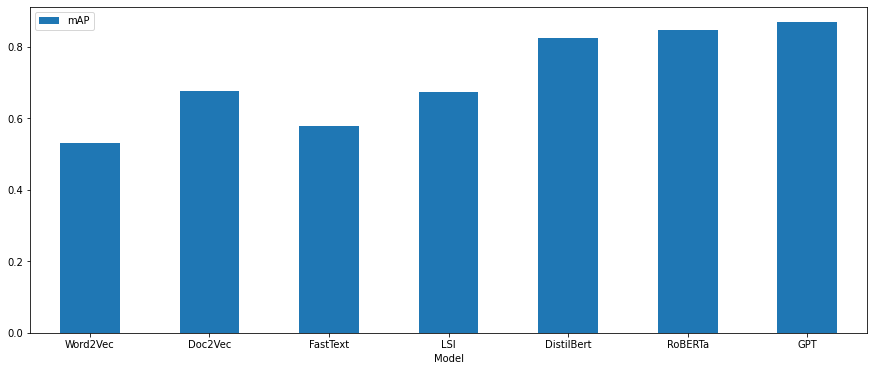

In [52]:
word2vec_mAP10 = word2vec_results_df['AP@10'].mean()
doc2vec_mAP10 = doc2vec_results_df['AP@10'].mean()
fast_text_mAP10 = fast_text_results_df['AP@10'].mean()
lsi_mAP10 = lsi_results_df['AP@10'].mean()
distilbert_mAP10 = distilbert_results_df['AP@10'].mean()
roberta_mAP10 = roberta_results_df['AP@10'].mean()
gpt_mAP10 = gpt_results_df['AP@10'].mean()

print(f'Word2Vec mAP10: {round(word2vec_mAP10, 2)}')
print(f'Doc2Vec mAP10: {round(doc2vec_mAP10, 2)}')
print(f'FastText mAP10: {round(fast_text_mAP10, 2)}')
print(f'LSI mAP10: {round(lsi_mAP10, 2)}')
print(f'DistilBERT mAP10: {round(distilbert_mAP10, 2)}')
print(f'RoBERTa mAP10: {round(roberta_mAP10, 2)}')
print(f'GPT-1 mAP10: {round(gpt_mAP10, 2)}')

mAP_data = [
    ['Word2Vec', word2vec_mAP10],
    ['Doc2Vec', doc2vec_mAP10], 
    ['FastText', fast_text_mAP10], 
    ['LSI', lsi_mAP10], 
    ['DistilBert', distilbert_mAP10], 
    ['RoBERTa', roberta_mAP10], 
    ['GPT', gpt_mAP10]
]
mAP_df = pd.DataFrame(mAP_data, columns=['Model', 'mAP'])
mAP_df.plot(kind='bar', x='Model', rot=0, figsize=(15, 6))

Word2Vec Execution time: 1.48
Doc2Vec Execution time: 1.51
FastText Execution time: 1.51
LSI Execution time: 1.54
DistilBERT Execution time: 1.61
RoBERTa Execution time: 1.62
GPT-1 Execution time: 1.78


<AxesSubplot:xlabel='Model'>

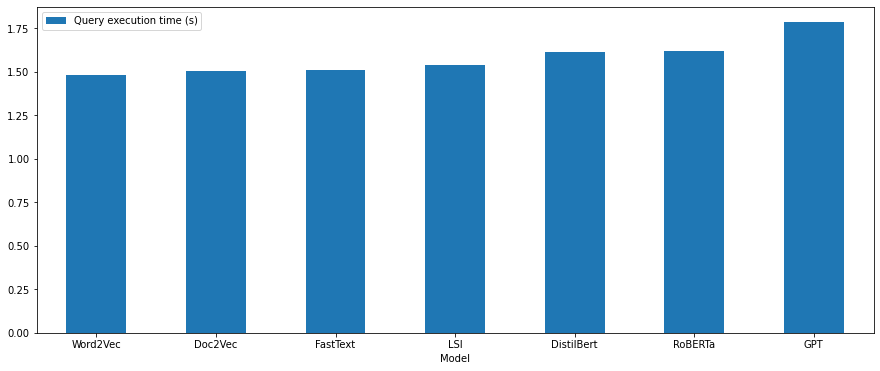

In [50]:
word2vec_exec_time = word2vec_results_df['T(s)'].mean()
doc2vec_exec_time = doc2vec_results_df['T(s)'].mean()
fast_text_exec_time = fast_text_results_df['T(s)'].mean()
lsi_exec_time = lsi_results_df['T(s)'].mean()
distilbert_exec_time = distilbert_results_df['T(s)'].mean()
roberta_exec_time = roberta_results_df['T(s)'].mean()
gpt_exec_time = gpt_results_df['T(s)'].mean()

print(f'Word2Vec Execution time: {round(word2vec_exec_time, 2)}')
print(f'Doc2Vec Execution time: {round(doc2vec_exec_time, 2)}')
print(f'FastText Execution time: {round(fast_text_exec_time, 2)}')
print(f'LSI Execution time: {round(lsi_exec_time, 2)}')
print(f'DistilBERT Execution time: {round(distilbert_exec_time, 2)}')
print(f'RoBERTa Execution time: {round(roberta_exec_time, 2)}')
print(f'GPT-1 Execution time: {round(gpt_exec_time, 2)}')

execution_data = [
    ['Word2Vec', word2vec_exec_time], 
    ['Doc2Vec', doc2vec_exec_time], 
    ['FastText', fast_text_exec_time], 
    ['LSI', lsi_exec_time], 
    ['DistilBert', distilbert_exec_time], 
    ['RoBERTa', roberta_exec_time], 
    ['GPT', gpt_exec_time]
]
execution_df = pd.DataFrame(execution_data, columns=['Model', 'Query execution time (s)'])
execution_df.plot(kind='bar', x='Model', rot=0, figsize=(15, 6))

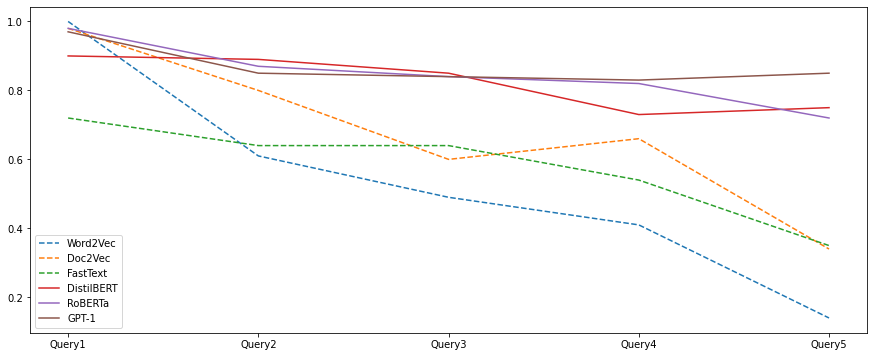

In [51]:
word2vec_AP10 = word2vec_results_df[['Query', 'AP@10']]
doc2vec_AP10 = doc2vec_results_df[['Query', 'AP@10']]
fast_text_AP10 = fast_text_results_df[['Query', 'AP@10']]
lsi_AP10 = lsi_results_df[['Query', 'AP@10']]
distilbert_AP10 = distilbert_results_df[['Query', 'AP@10']]
roberta_AP10 = roberta_results_df[['Query', 'AP@10']]
gpt_AP10 = gpt_results_df[['Query', 'AP@10']]

plt.figure(figsize=(15, 6))

x = word2vec_AP10['Query'].to_numpy()

plt.plot(word2vec_AP10['Query'], word2vec_AP10['AP@10'], label='Word2Vec', linestyle='--')
plt.plot(word2vec_AP10['Query'], doc2vec_AP10['AP@10'], label='Doc2Vec', linestyle='--')
plt.plot(word2vec_AP10['Query'], fast_text_AP10['AP@10'], label='FastText', linestyle='--')
plt.plot(word2vec_AP10['Query'], distilbert_AP10['AP@10'], label='DistilBERT', linestyle='-')
plt.plot(word2vec_AP10['Query'], roberta_AP10['AP@10'], label='RoBERTa', linestyle='-')
plt.plot(word2vec_AP10['Query'], gpt_AP10['AP@10'], label='GPT-1', linestyle='-')

# plt.grid(linestyle='-')
plt.legend()
plt.show()
